# **IDENTIFICACIÓN DE CLIENTES CON MAYOR PROPENSIÓN A REALIZAR UN DEPÓSITO A PLAZO FIJO**

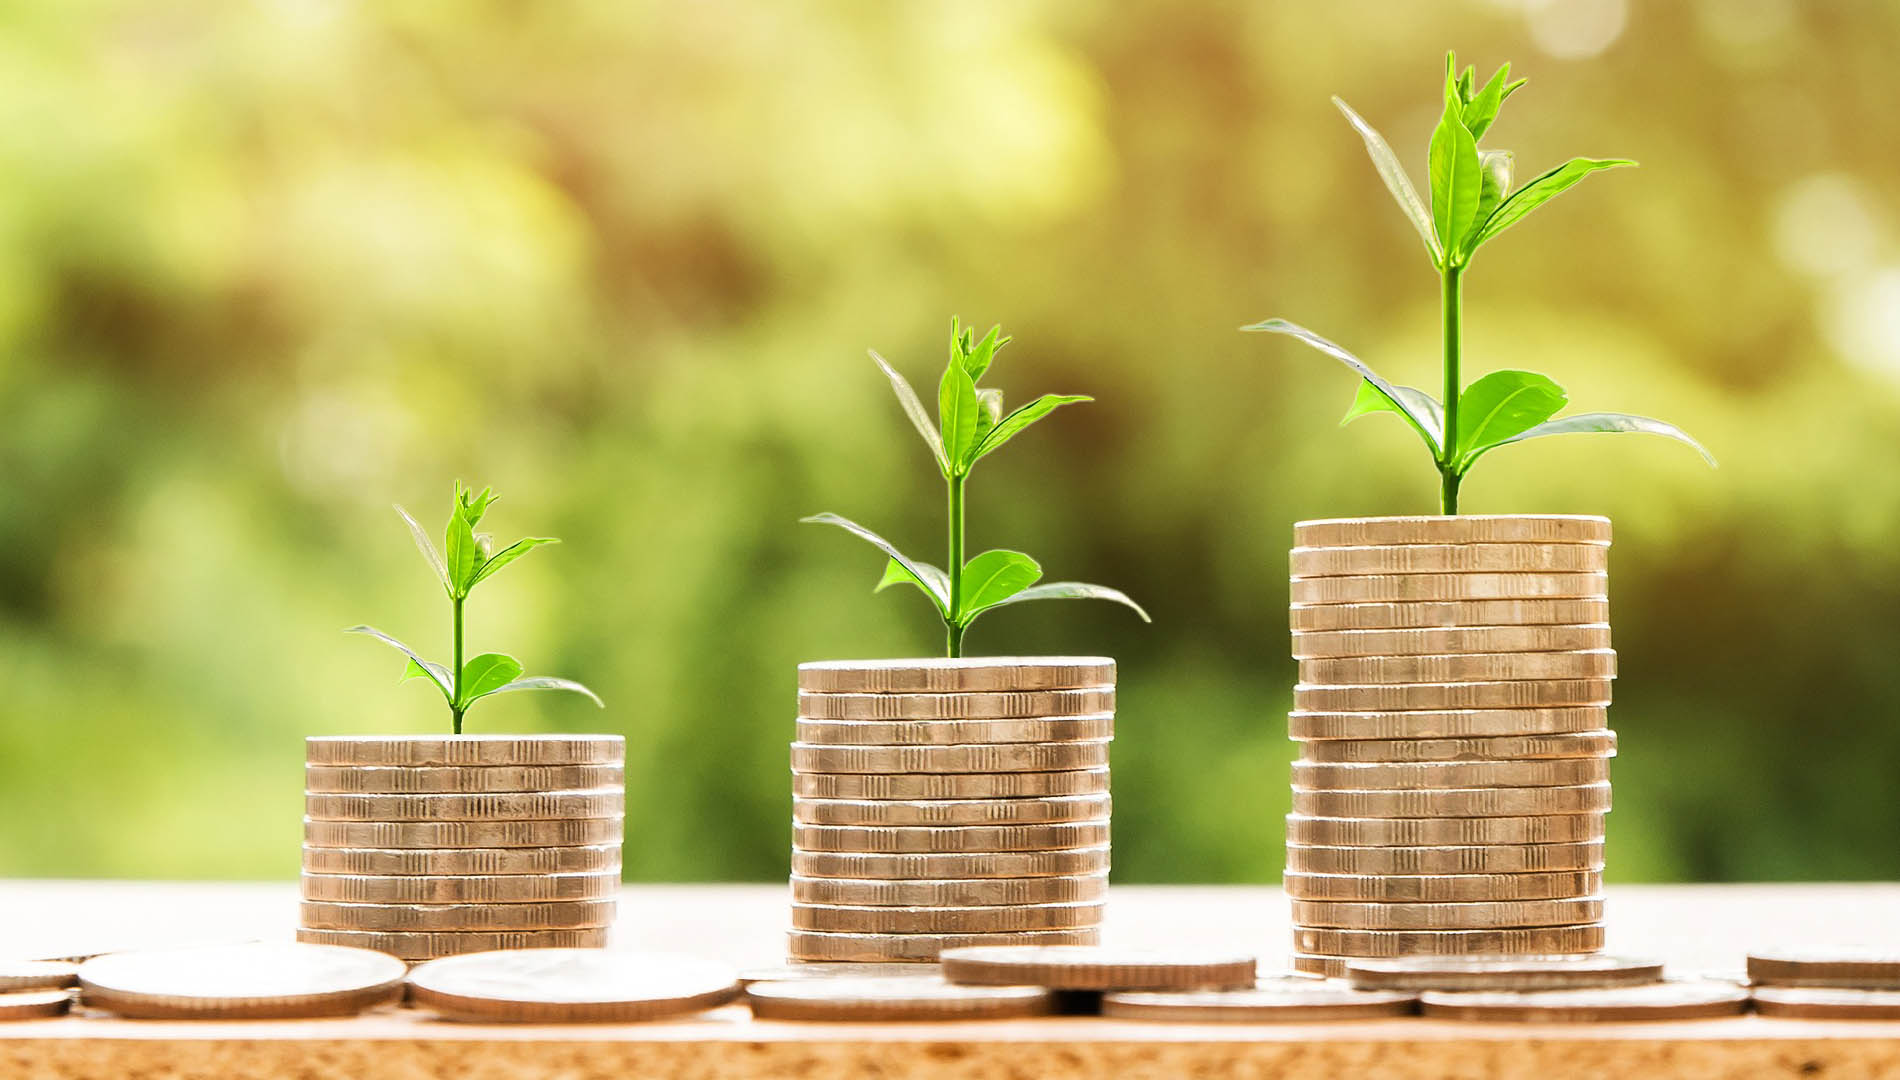

# **1. Carga de datos**


In [1]:
import pandas as pd
import numpy as np

DATA_PATH = "/content/dataset.csv"
SEP = ';'

# Función para cargar datos mediante una ruta y separador. Por default seria ',' 
def load_data(path,sep=','):
  return pd.read_csv(path,sep=sep)

df_customers = load_data(DATA_PATH,SEP)
print("Dimensiones del dataset de clientes: ",df_customers.shape)

Dimensiones del dataset de clientes:  (169059, 12)


Podemos observar que tenemos un dataframe de 169 059 filas y 12 columnas

# **2. Análisis Exploratorio de Datos (EDA)**


## **2.1. Descripción de los datos**

In [2]:
df_customers.describe()

,ID_SEC,EDAD,INGRESO_ESTIMADO,Target
count,169059.000000,169059.000000,167139.000000,169059.000000
mean,120840.160879,38.685630,6009.336908,0.002254
std,69717.507144,9.929581,7926.838829,0.047419
min,3.000000,0.000000,350.300000,0.000000
25%,60364.500000,31.000000,2153.550000,0.000000
50%,120918.000000,37.000000,3777.752500,0.000000
75%,181190.500000,44.000000,6907.696250,0.000000
max,241513.000000,117.000000,501995.000000,1.000000


De primera instancia podemos observar que **hay presencia de valores nulos en los campos numéricos**. Mas adelante vamos a encontrar para todas las columnas

In [3]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169059 entries, 0 to 169058
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID_SEC               169059 non-null  int64  
 1   FLGSEXO              169058 non-null  object 
 2   TIPESTCIVIL          169059 non-null  object 
 3   TIPNIVELEDUCACIONAL  169059 non-null  object 
 4   TIPSITUACIONLABORAL  169059 non-null  object 
 5   EDAD                 169059 non-null  int64  
 6   DEPARTAMENTO         168966 non-null  object 
 7   INGRESO_ESTIMADO     167139 non-null  float64
 8   NIVEL_SOCIECON       169059 non-null  object 
 9   SEGMENTO_DIGITAL     169059 non-null  object 
 10  SEGMENTO_BANCO       168912 non-null  object 
 11  Target               169059 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 15.5+ MB


En la siguiente tabla vemos que tenemos **3 columnas de tipo entero, 1 de tipo coma flotante y las 7 restantes de tipo object**

## **2.2. Preprocesamiento de datos**

In [4]:
df_customers.duplicated().sum()

0

Podemos observar que no tenemos registros duplicados en el dataframe

In [5]:
df_customers.isnull().sum()

ID_SEC                    0
FLGSEXO                   1
TIPESTCIVIL               0
TIPNIVELEDUCACIONAL       0
TIPSITUACIONLABORAL       0
EDAD                      0
DEPARTAMENTO             93
INGRESO_ESTIMADO       1920
NIVEL_SOCIECON            0
SEGMENTO_DIGITAL          0
SEGMENTO_BANCO          147
Target                    0
dtype: int64

Podemos confirmar que tenemos **valores perdidos (missing values) en 4 columnas de nuestro dataframe:** **FLGSEXO, DEPARTAMENTO, SEGMENTO_BANCO y INGRESO_ESTIMADO**

In [6]:
def delete_columns(df,columns):
  return df.drop(columns,axis=1)

df_customers = delete_columns(df_customers,['ID_SEC'])
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169059 entries, 0 to 169058
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FLGSEXO              169058 non-null  object 
 1   TIPESTCIVIL          169059 non-null  object 
 2   TIPNIVELEDUCACIONAL  169059 non-null  object 
 3   TIPSITUACIONLABORAL  169059 non-null  object 
 4   EDAD                 169059 non-null  int64  
 5   DEPARTAMENTO         168966 non-null  object 
 6   INGRESO_ESTIMADO     167139 non-null  float64
 7   NIVEL_SOCIECON       169059 non-null  object 
 8   SEGMENTO_DIGITAL     169059 non-null  object 
 9   SEGMENTO_BANCO       168912 non-null  object 
 10  Target               169059 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 14.2+ MB


**Se ha eliminado la columna 'ID_SEC' porque será irrelevante para nuestros modelos**

### 2.2.1. Tratamiento de valores perdidos en GÉNERO

In [7]:
df_customers['FLGSEXO'].value_counts()

M    106896
F     62162
Name: FLGSEXO, dtype: int64

Observamos que **Género es una variable categórica de 2 valores**

In [8]:
df_customers['FLGSEXO'].fillna(df_customers['FLGSEXO'].mode()[0], inplace=True)
df_customers.isnull().sum()

FLGSEXO                   0
TIPESTCIVIL               0
TIPNIVELEDUCACIONAL       0
TIPSITUACIONLABORAL       0
EDAD                      0
DEPARTAMENTO             93
INGRESO_ESTIMADO       1920
NIVEL_SOCIECON            0
SEGMENTO_DIGITAL          0
SEGMENTO_BANCO          147
Target                    0
dtype: int64

**Remplazamos el valor perdido por la Moda de dicha columna**

### 2.2.2. Tratamiento de valores perdidos en DEPARTAMENTO

In [9]:
df_customers['DEPARTAMENTO'].value_counts()

LIMA                         126843
CALLAO                         8236
AREQUIPA                       7571
LA LIBERTAD                    5866
PIURA                          3619
LAMBAYEQUE                     2744
ICA                            2032
ANCASH                         1707
CUZCO                          1578
JUNIN                          1571
CAJAMARCA                      1387
MOQUEGUA                        990
TACNA                           917
SAN MARTIN                      703
LORETO                          659
UCAYALI                         472
HUANUCO                         442
PUNO                            366
AYACUCHO                        325
CERRO DE PASCO                  192
AMAZONAS                        185
TUMBES                          181
APURIMAC                        159
MADRE DE DIOS                   140
HUANCAVELICA                     81
Name: DEPARTAMENTO, dtype: int64

Observamos que **Departamento es una variable categórica de 25 valores**

In [10]:
df_customers['DEPARTAMENTO'].fillna(df_customers['DEPARTAMENTO'].mode()[0], inplace=True)
df_customers.isnull().sum()

FLGSEXO                   0
TIPESTCIVIL               0
TIPNIVELEDUCACIONAL       0
TIPSITUACIONLABORAL       0
EDAD                      0
DEPARTAMENTO              0
INGRESO_ESTIMADO       1920
NIVEL_SOCIECON            0
SEGMENTO_DIGITAL          0
SEGMENTO_BANCO          147
Target                    0
dtype: int64

**Remplazamos el valor perdido por la Moda de dicha columna**

### 2.2.3. Tratamiento de valores perdidos en SEGMENTO_BANCO

In [11]:
df_customers['SEGMENTO_BANCO'].value_counts()

SEG_1      32395
SEG_2      30965
SEG_3      27686
SEG_4      22930
SEG_5      21205
SEG_6      17790
SEG_7       6622
SEG_8       4696
SIN_SEG     1789
SEG_09      1603
SEG_10      1090
SEG_11       141
Name: SEGMENTO_BANCO, dtype: int64

Observamos que **SEGMENTO_BANCO es una variable categórica de 12 valores**

In [12]:
df_customers['SEGMENTO_BANCO'].fillna('SIN_SEG', inplace=True)
df_customers.isnull().sum()

FLGSEXO                   0
TIPESTCIVIL               0
TIPNIVELEDUCACIONAL       0
TIPSITUACIONLABORAL       0
EDAD                      0
DEPARTAMENTO              0
INGRESO_ESTIMADO       1920
NIVEL_SOCIECON            0
SEGMENTO_DIGITAL          0
SEGMENTO_BANCO            0
Target                    0
dtype: int64

**Remplazamos el valor perdido por el valor 'SIN_SEG' que indica que dichos clientes no tienen asignación de Grupo Banco**

### 2.2.4. Tratamiento de valores perdidos en INGRESO_ESTIMADO

In [13]:
df_customers['INGRESO_ESTIMADO'].fillna(df_customers['INGRESO_ESTIMADO'].median(), inplace=True)
df_customers.isnull().sum()

FLGSEXO                0
TIPESTCIVIL            0
TIPNIVELEDUCACIONAL    0
TIPSITUACIONLABORAL    0
EDAD                   0
DEPARTAMENTO           0
INGRESO_ESTIMADO       0
NIVEL_SOCIECON         0
SEGMENTO_DIGITAL       0
SEGMENTO_BANCO         0
Target                 0
dtype: int64

En el caso del **INGRESO_ESTIMADO es una variable continua. Ante este caso, se ha utilizado el valor de la mediana para remplazar el valor perdido**

## **2.3. Análisis y Visualizaciones**




In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### 2.3.1. Análisis Univariado: Target

0    168678
1       381
Name: Target, dtype: int64


0    0.997746
1    0.002254
Name: Target, dtype: float64


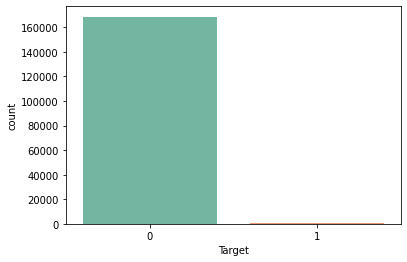

In [15]:
sns.countplot(x="Target", data=df_customers, palette="Set2")

print(df_customers['Target'].value_counts())
print('\n')
print(df_customers['Target'].value_counts(normalize=True))

Podemos observar que existen bastante diferencia en los valores de nuestro target. **Solamente el 0.002% de todos los clientes que tienen mayor propensión a realizar un depósito a plazo fijo. Lo resolveremos cuando lleguemos a la parte de los Modelos**

### 2.3.2. Relación de Target con Variables Númericas

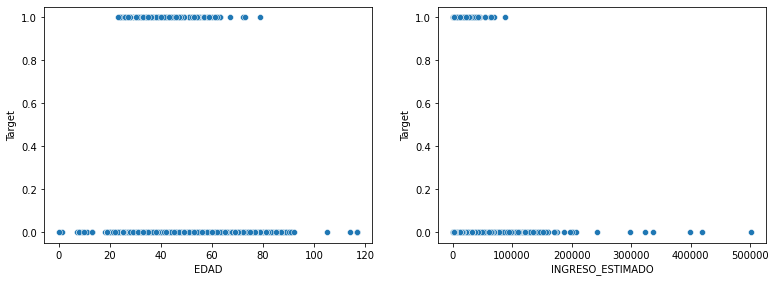

In [16]:
def subplots_scatterplot(size,df):
  features= df.select_dtypes(exclude=['object']).columns
  plt.figure(figsize=size)
  for i in range(len(features)-1):
    plt.subplot(4,3,i+1)
    sns.scatterplot(data=df,x=features[i],y='Target')

subplots_scatterplot((20,20),df_customers)

En la gráfica observamos lo siguiente:
 

*   **Los clientes que tienen un rango de edad entre 20 a 60 tienen mayor propensión a realizar depósitos a plazo fijo**
*   **Los clientes que tienen un ingreso estimado bajo tienen mayor propensión a realizar depósitos a plazo fijo**



📘 Esta información la podemos comprobarla con lo siguiente investigación: "Las personas de bajos ingresos realizan inversiones de bajo 
riesgo" (Investigation of Causality between Interest Rate and Deposit Investor’s Behaviour, 2018) 

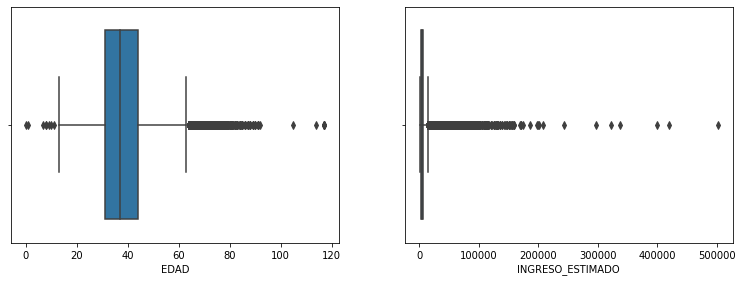

In [17]:
def subplots_boxplot(size,df):
  features= df.select_dtypes(exclude=['object']).columns
  plt.figure(figsize=size)
  for i in range(len(features)-1):
    plt.subplot(4,3,i+1)
    sns.boxplot(x=df[features[i]])

subplots_boxplot((20,20),df_customers)

En la gráfica observamos que ambas **variables númericas tienen valores extremos que pueden sesgar (presencia de outliers)**

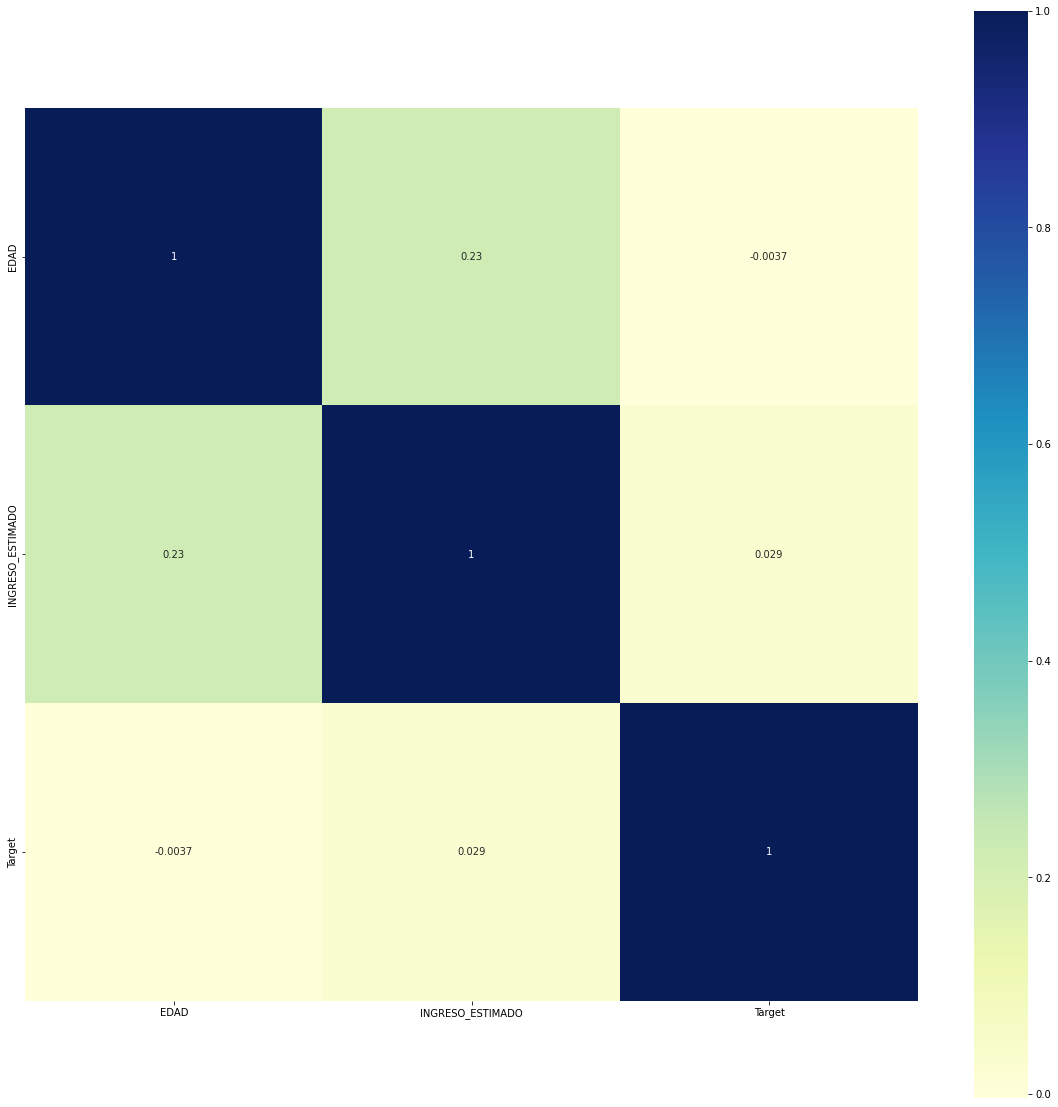

In [18]:
def correlation_matrix(df):
  corr=df.corr()
  plt.figure(figsize=(20,20))
  sns.heatmap(corr,cmap="YlGnBu",square=True,annot=True)

correlation_matrix(df_customers)

En la matriz de correlación mostrada, podemos observar que **existe una baja correlación de las variables cuantitativas entre sí y entre el target**

### 2.3.3. Relación de Target con Variables Categóricas

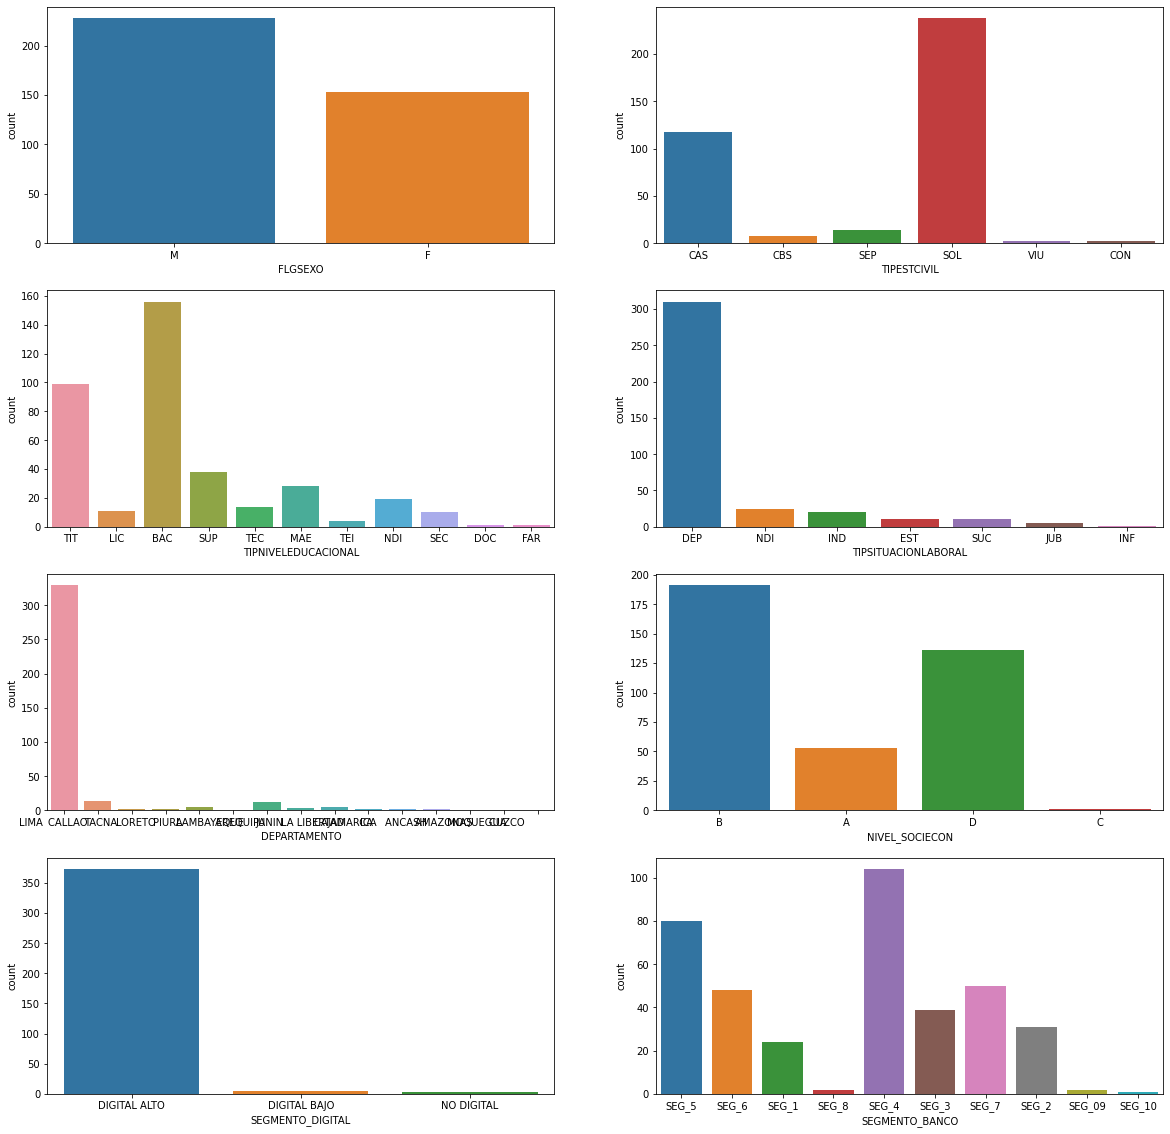

In [19]:
def subplots_countplot(size,df):
  features= df.select_dtypes(exclude=['int64','float64']).columns
  plt.figure(figsize=size)
  for i in range(len(features)):
    plt.subplot(4,2,i+1)
    sns.countplot(x=features[i], data=df)

# Filtramos los datos de clientes con mayor propensión a realizar un depósito a plazo fijo (Target == 1)
subplots_countplot((20,20),df_customers[df_customers['Target']==1])

En la gráfica observamos lo siguientes datos significativos:

*  **Los clientes Masculinos tienen mayor propensión a realizar un depósito a plazo fijo**
*  **Los clientes de nivel Socioeconómico "B" tienen mayor propensión a realizar un depósito a plazo fijo**
*  **Los clientes de grupo Banco 4 y 5 tienen mayor propensión a realizar un depósito a plazo fijo**

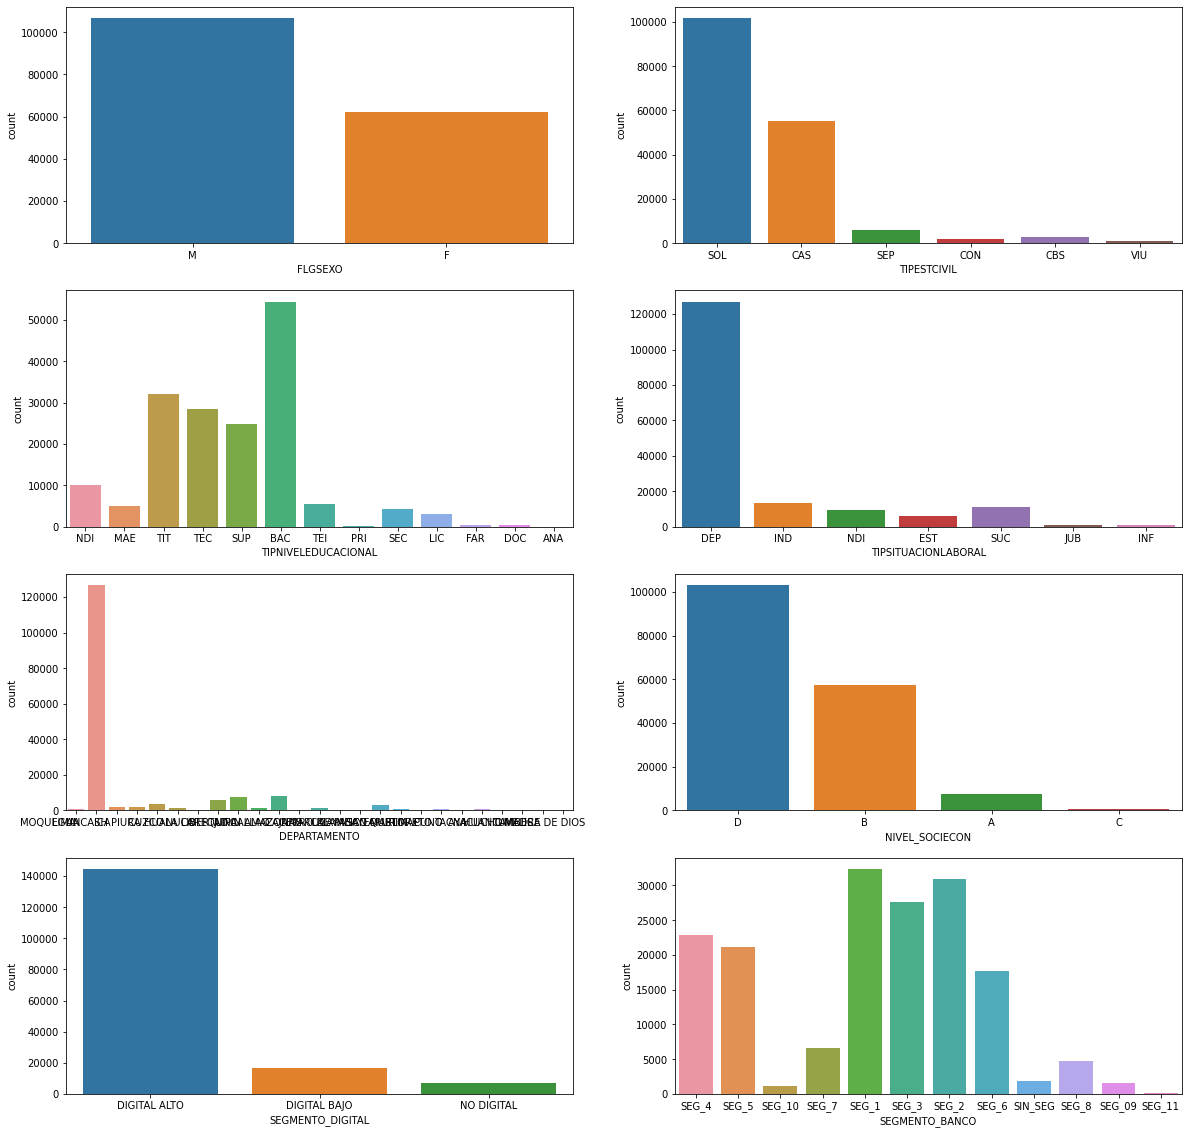

In [20]:
# Filtramos los datos de clientes con menor propensión a realizar un depósito a plazo fijo (Target == 0)
subplots_countplot((20,20),df_customers[df_customers['Target']==0])

En la gráfica observamos lo siguientes datos significativos:

*  **Los clientes Femeninos tienen menor propensión a realizar un depósito a plazo fijo**
*  **Los clientes de nivel Socioeconómico "D" tienen menor propensión a realizar un depósito a plazo fijo**
*  **Los clientes de grupo Banco 1 y 2 tienen mayor propensión a realizar un depósito a plazo fijo**

### 2.3.4. Identificación de Outliers

In [21]:
def identify_outliers(df):
  for i in df.describe().columns:
    Q1 = df.describe().at['25%', i]
    Q3 = df.describe().at['75%', i]
    IQR = Q3-Q1
    LTV = Q1 - 1.5 * IQR 
    UTV = Q3 + 1.5 * IQR 
    print('Nombre de Columna                                         :', i)
    print('Rango Intercuartil IQR                                    :', IQR)
    print('Limite Inferior                                           :', LTV)
    print('Limite Superior                                           :', UTV)
    print('Número de outliers por debajo del bigote inferior         :', df[df[i] < LTV][i].count())
    print('Número de outliers por encima del bigote superior         :', df[df[i] > UTV][i].count())
    print('Total de Ourliers                                         :', (df[df[i] < LTV][i].count()) + (df[df[i] > UTV][i].count()))
    print('\n')

identify_outliers(df_customers.drop('Target',axis=1))

Nombre de Columna                                         : EDAD
Rango Intercuartil IQR                                    : 13.0
Limite Inferior                                           : 11.5
Limite Superior                                           : 63.5
Número de outliers por debajo del bigote inferior         : 8
Número de outliers por encima del bigote superior         : 3798
Total de Ourliers                                         : 3806


Nombre de Columna                                         : INGRESO_ESTIMADO
Rango Intercuartil IQR                                    : 4678.89625
Limite Inferior                                           : -4850.918125
Limite Superior                                           : 13864.666874999999
Número de outliers por debajo del bigote inferior         : 0
Número de outliers por encima del bigote superior         : 13528
Total de Ourliers                                         : 13528




Podemos observar que **obtenemos los límites inferiores y superiores de los outliers**

In [22]:
limits_age_outliers = (df_customers['EDAD'] > 11.5) & (df_customers['EDAD'] < 63.5)
limits_income_outliers = (df_customers['INGRESO_ESTIMADO'] > -4850.918125) & (df_customers['INGRESO_ESTIMADO'] < 13864.666874999999)
df_customers = df_customers[limits_age_outliers | limits_income_outliers]

print(df_customers['Target'].value_counts())
print('\n')
print(df_customers['Target'].value_counts(normalize=True))
print("Dimensiones del dataset de clientes: ",df_customers.shape)

0    168118
1       380
Name: Target, dtype: int64


0    0.997745
1    0.002255
Name: Target, dtype: float64
Dimensiones del dataset de clientes:  (168498, 11)


Finalmente hemos eliminado los outliers de nuestro dataset, ahora tenemos 168 498 filas. Sin embargo, **conservamos la misma relación de nuestra variable objetivo (solo el 0.002% de clientes que tienen mayor propensión a realizar un depósito a plazo fijo)**

☝ Esta relación de nuestra variable objetivo presente en nuestro dataset se le conoce como **Datos Desbalanceados**. En la siguiente sección nos enfoncaremos en solucionarlo ....

# **3. Preparación de Matriz de Modelamiento**

## 3.1. Codificación de Etiquetas 

In [23]:
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [24]:
df_customers['FLGSEXO'] = df_customers['FLGSEXO'].astype('category')
df_customers['TIPESTCIVIL'] = df_customers['TIPESTCIVIL'].astype('category')
df_customers['TIPNIVELEDUCACIONAL'] = df_customers['TIPNIVELEDUCACIONAL'].astype('category')
df_customers['TIPSITUACIONLABORAL'] = df_customers['TIPSITUACIONLABORAL'].astype('category')
df_customers['DEPARTAMENTO'] = df_customers['DEPARTAMENTO'].astype('category')
df_customers['NIVEL_SOCIECON'] = df_customers['NIVEL_SOCIECON'].astype('category')
df_customers['SEGMENTO_DIGITAL'] = df_customers['SEGMENTO_DIGITAL'].astype('category')
df_customers['SEGMENTO_BANCO'] = df_customers['SEGMENTO_BANCO'].astype('category')

Hemos convertido los campos anteriores a tipo **"Categórico" porque estas variables no representan orden/precedencia**

In [25]:
labelencoder = LabelEncoder()
df_customers['FLGSEXO'] = labelencoder.fit_transform(df_customers['FLGSEXO'])
df_customers['TIPESTCIVIL'] = labelencoder.fit_transform(df_customers['TIPESTCIVIL'])
df_customers['TIPNIVELEDUCACIONAL'] = labelencoder.fit_transform(df_customers['TIPNIVELEDUCACIONAL'])
df_customers['TIPSITUACIONLABORAL'] = labelencoder.fit_transform(df_customers['TIPSITUACIONLABORAL'])
df_customers['DEPARTAMENTO'] = labelencoder.fit_transform(df_customers['DEPARTAMENTO'])
df_customers['NIVEL_SOCIECON'] = labelencoder.fit_transform(df_customers['NIVEL_SOCIECON'])
df_customers['SEGMENTO_DIGITAL'] = labelencoder.fit_transform(df_customers['SEGMENTO_DIGITAL'])
df_customers['SEGMENTO_BANCO'] = labelencoder.fit_transform(df_customers['SEGMENTO_BANCO'])

df_customers.head(5)

,FLGSEXO,TIPESTCIVIL,TIPNIVELEDUCACIONAL,TIPSITUACIONLABORAL,EDAD,DEPARTAMENTO,INGRESO_ESTIMADO,NIVEL_SOCIECON,SEGMENTO_DIGITAL,SEGMENTO_BANCO,Target
0,1,4,6,0,33,18,8087.0600,3,0,6,0
1,1,0,5,0,44,15,19000.0000,1,0,7,0
2,1,0,12,2,67,15,6684.5875,1,0,2,0
3,0,0,6,0,58,15,37019.0750,0,0,9,0
4,0,0,10,5,58,15,3070.2900,3,0,1,0


**Logramos codificar todas nuestras variables categoricas a variables numéricas sin tener el problema de orden/dependencia**

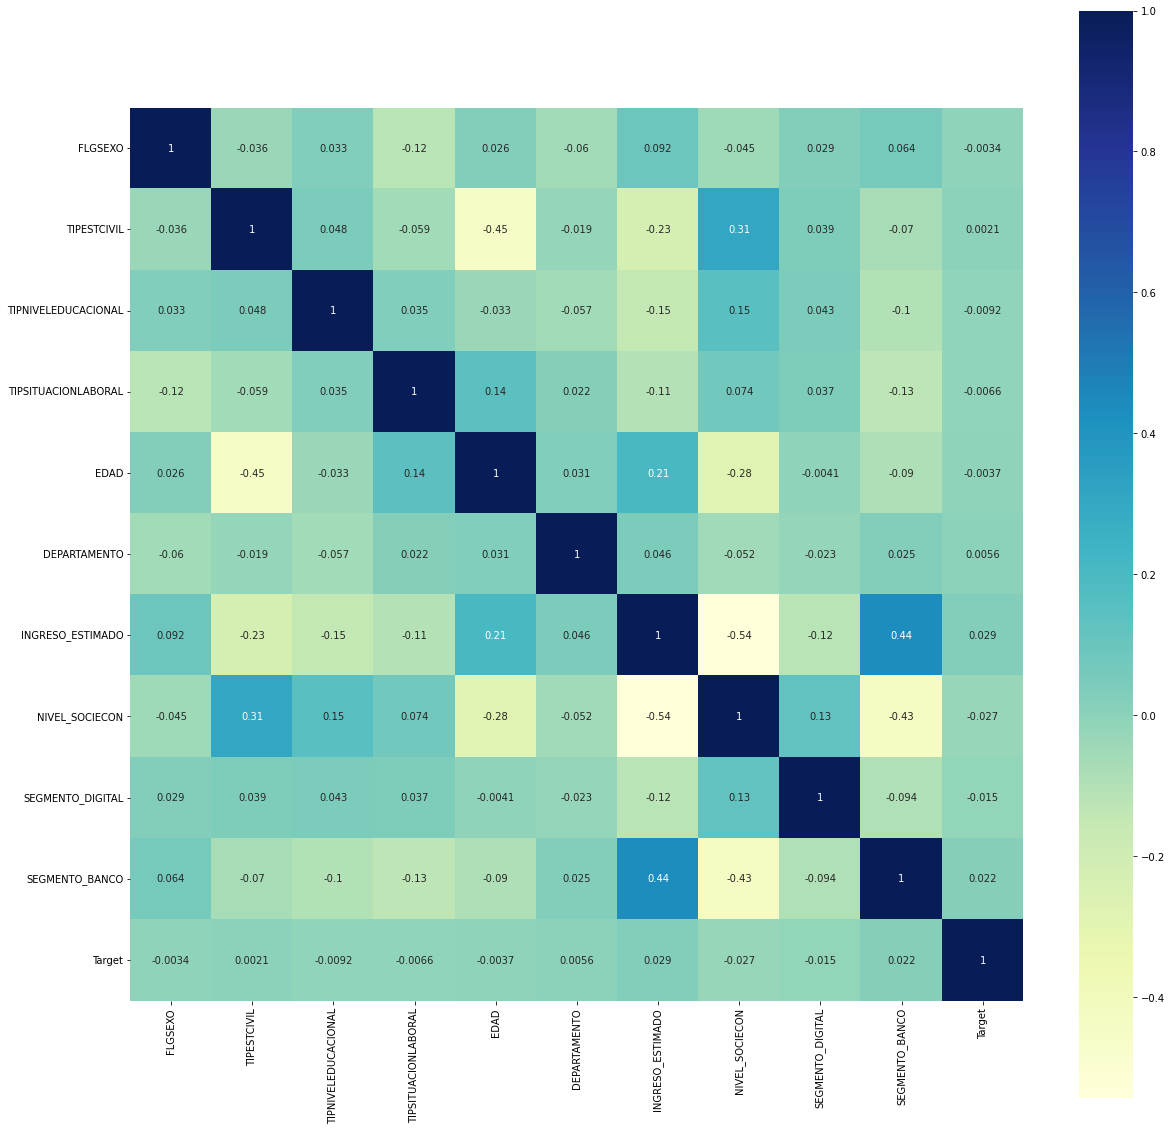

In [26]:
correlation_matrix(df_customers)

Observamos nuevamente que las variables tienen menor o poca correlación entre sí. La mayor es la relación entre el ingreso promedio de cada cliente con su clasificación de grupo bancario (Lo cual tiene mucho sentido)

In [27]:
df_customers.iloc[:,:-1].shape

(168498, 10)

**Recordemos que tenemos 10 columnas que serán nuestras caracteristicas**

In [28]:
oneHotCols = ['TIPESTCIVIL','TIPNIVELEDUCACIONAL','TIPSITUACIONLABORAL','DEPARTAMENTO','NIVEL_SOCIECON','SEGMENTO_DIGITAL','SEGMENTO_BANCO']
X = pd.get_dummies(df_customers.iloc[:,:-1],columns=oneHotCols)
X.shape

(168498, 73)

Debido a que teniamos variables categoricas de varios valores, hemos generado más columnas ficticias. **Ahora tenemos 73 columnas**

In [29]:
X.columns

Index(['FLGSEXO', 'EDAD', 'INGRESO_ESTIMADO', 'TIPESTCIVIL_0', 'TIPESTCIVIL_1',
       'TIPESTCIVIL_2', 'TIPESTCIVIL_3', 'TIPESTCIVIL_4', 'TIPESTCIVIL_5',
       'TIPNIVELEDUCACIONAL_0', 'TIPNIVELEDUCACIONAL_1',
       'TIPNIVELEDUCACIONAL_2', 'TIPNIVELEDUCACIONAL_3',
       'TIPNIVELEDUCACIONAL_4', 'TIPNIVELEDUCACIONAL_5',
       'TIPNIVELEDUCACIONAL_6', 'TIPNIVELEDUCACIONAL_7',
       'TIPNIVELEDUCACIONAL_8', 'TIPNIVELEDUCACIONAL_9',
       'TIPNIVELEDUCACIONAL_10', 'TIPNIVELEDUCACIONAL_11',
       'TIPNIVELEDUCACIONAL_12', 'TIPSITUACIONLABORAL_0',
       'TIPSITUACIONLABORAL_1', 'TIPSITUACIONLABORAL_2',
       'TIPSITUACIONLABORAL_3', 'TIPSITUACIONLABORAL_4',
       'TIPSITUACIONLABORAL_5', 'TIPSITUACIONLABORAL_6', 'DEPARTAMENTO_0',
       'DEPARTAMENTO_1', 'DEPARTAMENTO_2', 'DEPARTAMENTO_3', 'DEPARTAMENTO_4',
       'DEPARTAMENTO_5', 'DEPARTAMENTO_6', 'DEPARTAMENTO_7', 'DEPARTAMENTO_8',
       'DEPARTAMENTO_9', 'DEPARTAMENTO_10', 'DEPARTAMENTO_11',
       'DEPARTAMENTO_12', 'DEPART

Con el siguiente resultado **verificamos los nombres de las 73 características**

## 3.2. Tratamiento para Datos Desbalanceados

Como hemos podido observar en la sección anterior, **la clase minorista de nuestro target es el valor 1 (con solo 380 registros)**. Aplicaremos la técnica de sobremuestreo sintético de minorías (SMOTE) para que las muestras de clases minoristas y mayoristas coincidan

📘 "SMOTE es un método eficaz que genera ejemplos adicionales de la clase minoritaria, en un intento de que el tamaño de su conjunto de datos coincida con el de la clase mayoritaria" (A Comprehensive Analysis of Synthetic Minority Oversampling Technique (SMOTE) for handling class imbalance, 2019)

In [30]:
y = df_customers.iloc[:,-1]
y.value_counts()

0    168118
1       380
Name: Target, dtype: int64

**Recordemos que teniamos nuestra clase minorista 1 con un porcentaje de 0.002 % (380 valores)**

In [31]:
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)
pd.Series(y_SMOTE).value_counts()

0    168118
1    168118
Name: Target, dtype: int64

**Hemos aplicado la técnica SMOTE para lograr equilibrar nuestro dataset**

In [32]:
X_SMOTE.head(5)

,FLGSEXO,EDAD,INGRESO_ESTIMADO,TIPESTCIVIL_0,TIPESTCIVIL_1,TIPESTCIVIL_2,TIPESTCIVIL_3,TIPESTCIVIL_4,TIPESTCIVIL_5,TIPNIVELEDUCACIONAL_0,...,SEGMENTO_BANCO_2,SEGMENTO_BANCO_3,SEGMENTO_BANCO_4,SEGMENTO_BANCO_5,SEGMENTO_BANCO_6,SEGMENTO_BANCO_7,SEGMENTO_BANCO_8,SEGMENTO_BANCO_9,SEGMENTO_BANCO_10,SEGMENTO_BANCO_11
0,1,33,8087.0600,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,44,19000.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,67,6684.5875,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,58,37019.0750,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,58,3070.2900,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **4. Desarrollo y Pruebas de Modelos**

In [33]:
import statsmodels.api as sm
from numpy import loadtxt
from numpy import mean

from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [34]:
# Definir variables para el train_test_splot
TEST_SIZE = 0.30
RANDOM_STATE = 42

def df_train_test_split(X,Y,test_size,random_state):
  return train_test_split(X_SMOTE, y_SMOTE, test_size=test_size, random_state=random_state)

X_train, X_test, y_train, y_test = df_train_test_split(X_SMOTE, y_SMOTE, TEST_SIZE, RANDOM_STATE)

# Escalado de Caracteristicas
sc = StandardScaler()
X_train_SC = sc.fit_transform(X_train)
X_test_SC = sc.fit_transform(X_test)

print(type(X_train_SC))
print(type(X_test_SC))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Luego de dividir nuestro dataset en data de entrenamiento y pruebas.
Hemos estandarizado nuestras caracteristicas por el **método de Escalado Estandár (StandardScaler) que es muy útil cuando no tenemos variables constantes durante un periodo de tiempo**




 Comenzaremos a desarrollar varios algoritmos de clasificación:

*   LogisticRegression
*   DecisionTree
*   Naive Bayes
*   KNeighborsClassifier
*   XG-Boost


Para la prueba de nuestros modelos, vamos a utilizar las siguientes métricas:
*   Precision
*   Recall
*   Accuracy
*   F1 Score
*   Confusion Matrix
*   Cross Validation




In [35]:
# Definir nuestras variables para almacenar resultados y grupos KFOLD
models_results = []
SEED = 8
KFOLD = KFold(n_splits=10, random_state=SEED, shuffle=True)

Definimos lo siguiente:
*   model_result: Nuestra lista para almacenar los resultados
*   SEED: Es nuestra semilla para definir los pliegues KFold
*   KFOLD: Es nuestra variable que almacena los pliegues



## 4.1. LogisticRegression

In [36]:
# Definir el modelo
sol = 'lbfgs'
max_iter=300

LogReg = LogisticRegression(solver = sol,max_iter=max_iter)
LogReg.fit(X_train_SC, y_train)

# Definir predicción y metricas
LogReg_y_pred = LogReg.predict(X_test_SC)
LogReg_Score = LogReg.score(X_test_SC, y_test)
LogReg_ScoreAccuracy = accuracy_score(y_test, LogReg_y_pred)
LogReg_PrecisonScore = precision_score(y_test, LogReg_y_pred)
LogReg_RecollScore = recall_score(y_test, LogReg_y_pred)
LogReg_F1 = f1_score(y_test, LogReg_y_pred)

# Obtener los resultados de la validación cruzada
logReg_cross_validation_result = model_selection.cross_val_score(LogReg, X_train_SC, y_train, cv=KFOLD, scoring='accuracy')

# Obtener los resultados generales del modelo y almacenarlo
logReg_models_results = pd.DataFrame([['Regresión Logistica', LogReg_ScoreAccuracy, LogReg_PrecisonScore,LogReg_RecollScore, LogReg_F1, logReg_cross_validation_result.mean(), logReg_cross_validation_result.std()]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
models_results.append(logReg_models_results)

# Mostrar Resultados
print('ROC AUC Medio: %.3f' % mean(logReg_cross_validation_result))
print('Score de Entrenamiento',LogReg.score(X_train_SC, y_train))
print('Score de Pruebas',LogReg.score(X_test_SC, y_test))
print('\n')
print('Reporte de Clasificación en Modelo de Modelo de Regresión Logística: \n',metrics.classification_report(y_test, LogReg_y_pred))


ROC AUC Medio: 0.975
Score de Entrenamiento 0.97531918509549
Score de Pruebas 0.9751960424700855


Reporte de Clasificación en Modelo de Modelo de Regresión Logística: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     50405
           1       0.99      0.96      0.97     50466

    accuracy                           0.98    100871
   macro avg       0.98      0.98      0.98    100871
weighted avg       0.98      0.98      0.98    100871



☝ La regresión Logística **es un modelo de clasificación que tiene poca probabilidad que se sobreajuste debido a su hiperplano con dimensiones más bajas**. Según los resultados obtenidos **no observamos presencia de Overfitting en nuestro modelo**. Sin embargo notamos **una diferencia considerable en la precisión de las clases de nuestra variable objetivo Target**

## 4.2. DecisionTree

In [37]:
# Definir el modelo
crit = 'entropy'
seed_tree = 42
depth = 10
samples_leaf = 15

dcTree = DecisionTreeClassifier(criterion = crit, random_state=seed_tree,max_depth=depth, min_samples_leaf=samples_leaf)
dcTree.fit(X_train_SC, y_train.values.ravel())

# Definir predicción y metricas
dcTree_y_pred = dcTree.predict(X_test_SC)
dcTree_Score  = dcTree.score(X_test_SC, y_test)
dcTree_ScoreAccuracy = accuracy_score(y_test, dcTree_y_pred)
dcTree_PrecisonScore = precision_score(y_test, dcTree_y_pred)
dcTree_RecollScore = recall_score(y_test, dcTree_y_pred)
dcTree_F1 = f1_score(y_test, dcTree_y_pred)

# Obtener los resultados de la validación cruzada
dcTree_cross_validation_result = model_selection.cross_val_score(dcTree, X_train_SC, y_train, cv=KFOLD, scoring='accuracy')

# Obtener los resultados generales del modelo y almacenarlo
dcTree_models_results = pd.DataFrame([['Arboles de Decisión ', dcTree_ScoreAccuracy, dcTree_PrecisonScore,dcTree_RecollScore, dcTree_F1, dcTree_cross_validation_result.mean(), dcTree_cross_validation_result.std()]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
models_results.append(dcTree_models_results)

# Mostrar Resultados
print('ROC AUC Medio: %.3f' % mean(dcTree_cross_validation_result))
print('Score de Entrenamiento',dcTree.score(X_train_SC, y_train))
print('Score de Pruebas',dcTree.score(X_test_SC, y_test))
print('\n')
print('Reporte de Clasificación en Modelo de Arboles de Decisión: \n',metrics.classification_report(y_test, dcTree_y_pred))

ROC AUC Medio: 0.944
Score de Entrenamiento 0.9445839440868439
Score de Pruebas 0.9401611959829882


Reporte de Clasificación en Modelo de Arboles de Decisión: 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     50405
           1       0.92      0.97      0.94     50466

    accuracy                           0.94    100871
   macro avg       0.94      0.94      0.94    100871
weighted avg       0.94      0.94      0.94    100871



☝ Los Árboles de Desición **son muy útiles para problemas de clasificación binaria gracias a su estructura de nodos**. Al determinar su profundidad y número de hojas podemos controlar el problema de sobreajuste. **Según los resultados obtenidos no observamos presencia de Overfitting en nuestro modelo**. Sin embargo tenemos u**na menor puntuacíon y mayor diferencia en la precisión de las clases de nuestra variable objetivo Target**

## 4.3. Naive Bayes

In [38]:
# Definir el modelo
GNB = GaussianNB()
GNB.fit(X_train_SC, y_train)

#  Definir predicción y metricas
GNB_y_pred  = GNB.predict(X_test_SC)
GNB_Score = GNB.score(X_test_SC, y_test)
GNB_ScoreAccuracy = accuracy_score(y_test, GNB_y_pred)
GNB_PrecisonScore = precision_score(y_test, GNB_y_pred)
GNB_RecollScore = recall_score(y_test, GNB_y_pred)
GNB_F1 = f1_score(y_test, GNB_y_pred)

# Obtener los resultados de la validación cruzada
GNB_cross_validation_result = model_selection.cross_val_score(GNB, X_train_SC, y_train, cv=KFOLD, scoring='accuracy')

# Obtener los resultados generales del modelo y almacenarlo
GNB_models_results = pd.DataFrame([['Naive Bayes', GNB_ScoreAccuracy, GNB_PrecisonScore,GNB_RecollScore, GNB_F1, GNB_cross_validation_result.mean(), GNB_cross_validation_result.std()]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
models_results.append(GNB_models_results)

# Mostrar Resultados
print('ROC AUC Medio: %.3f' % mean(GNB_cross_validation_result))
print('Score en Entrenamiento \n',GNB.score(X_train_SC, y_train))
print('Score en Pruebas \n',GNB.score(X_test_SC, y_test))
print('\n')
print('Reporte de Clasificación EN Modelo de Naive Bayes: \n',metrics.classification_report(y_test, GNB_y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC AUC Medio: 0.775
Score en Entrenamiento 
 0.7748773182078899
Score en Pruebas 
 0.49969763361124603


Reporte de Clasificación EN Modelo de Naive Bayes: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     50405
           1       0.00      0.00      0.00     50466

    accuracy                           0.50    100871
   macro avg       0.25      0.50      0.33    100871
weighted avg       0.25      0.50      0.33    100871



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


☝ Naive Bayes **es un algoritmo de clasificacíon de funcionamiento simple pero muy popular en problemas de clasificación de texto**. **Sin embargo tiene una desventaja en nuestro caso, existe presencia de observaciones 0** debido a las distribuciones de frecuencia diferentes en ambos grupos de datos

## 4.4. KNeighbors

In [41]:
# Definir el modelo
n = 6
w = 'uniform'
m = 'euclidean'

Knn = KNeighborsClassifier(n_neighbors=n, weights = w, metric=m)
Knn.fit(X_train_SC, y_train)

#  Definir predicción y metricas
Knn_y_pred = Knn.predict(X_test_SC)
Knn_Score = Knn.score(X_test_SC, y_test)
Knn_ScoreAccuracy = accuracy_score(y_test, Knn_y_pred)
Knn_PrecisonScore = precision_score(y_test, Knn_y_pred)
Knn_RecollScore = recall_score(y_test, Knn_y_pred)
Knn_F1 = f1_score(y_test, Knn_y_pred)

# Obtener los resultados de la validación cruzada
Knn_cross_validation_result = model_selection.cross_val_score(Knn, X_train_SC, y_train, cv=KFOLD, scoring='accuracy')

# Obtener los resultados generales del modelo y almacenarlo
knn_models_results = pd.DataFrame([['K-Nearest Neighbors', Knn_ScoreAccuracy, Knn_PrecisonScore,Knn_RecollScore, Knn_F1, Knn_cross_validation_result.mean(), Knn_cross_validation_result.std()]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
models_results.append(knn_models_results)

# Mostrar Resultados
print('ROC AUC Medio: %.3f' % mean(Knn_cross_validation_result))
print('Score en Entrenamiento \n',Knn.score(X_train_SC, y_train))
print('Score en Pruebas \n',Knn.score(X_test_SC, y_test))
print('\n')
print('Reporte de Clasificación EN Modelo de KNeighbors: \n',metrics.classification_report(y_test, Knn_y_pred))

ROC AUC Medio: 0.997
Score en Entrenamiento 
 0.9973445499543263
Score en Pruebas 
 0.9949440374339503


Reporte de Clasificación EN Modelo de KNeighbors: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     50405
           1       1.00      0.99      0.99     50466

    accuracy                           0.99    100871
   macro avg       0.99      0.99      0.99    100871
weighted avg       0.99      0.99      0.99    100871



☝ El Clasificador KNeighbors **es un algoritmo que utiliza todas los datos de entrenamiento para determinar la clase objetiv**o y los resultados son almacenados en memoria **(es por ello que tiene un costo computacional muy alto)**

## 4.5. XG-Boost

In [94]:
# Definir el modelo
n_est = 15
ob = 'binary:logistic'
se = 42
Xgb = XGBClassifier(objective=ob, n_estimators=n_est,seed=se)

#  Definir predicción y metricas
Xgb.fit(X_train_SC, y_train)
Xgb_y_pred = Xgb.predict(X_test_SC)
Xgb_Score = Xgb.score(X_test_SC, y_test)
Xgb_ScoreAccuracy = accuracy_score(y_test, Xgb_y_pred)
Xgb_PrecisonScore = precision_score(y_test, Xgb_y_pred)
Xgb_RecollScore = recall_score(y_test, Xgb_y_pred)
Xgb_F1 = f1_score(y_test, Xgb_y_pred)

# Obtener los resultados de la validación cruzada
Xgb_cross_validation_result = model_selection.cross_val_score(Xgb, X_train_SC, y_train, cv=KFOLD, scoring='accuracy')

# Obtener los resultados generales del modelo y almacenarlo
Xgb_models_results = pd.DataFrame([['XG-Boost', Xgb_ScoreAccuracy, Xgb_PrecisonScore, Xgb_RecollScore, Xgb_F1, Xgb_cross_validation_result.mean(), Xgb_cross_validation_result.std()]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
models_results.append(Xgb_models_results)

# Mostrar Resultados
print('ROC AUC Medio: %.3f' % mean(Xgb_cross_validation_result))
print('Score en Entrenamiento \n',Xgb.score(X_train_SC, y_train))
print('Score en Pruebas \n',Xgb.score(X_test_SC, y_test))
print('\n')
print('Reporte de Clasificación EN Modelo de XG-Boost: \n',metrics.classification_report(y_test, Xgb_y_pred))

ROC AUC Medio: 0.884
Score en Entrenamiento 
 0.8881227030357105
Score en Pruebas 
 0.886458942609868


Reporte de Clasificación EN Modelo de XG-Boost: 
               precision    recall  f1-score   support

           0       0.89      0.88      0.89     50405
           1       0.88      0.89      0.89     50466

    accuracy                           0.89    100871
   macro avg       0.89      0.89      0.89    100871
weighted avg       0.89      0.89      0.89    100871



☝ **XG-Boost es uno de los algoritmos mas potentes y populares para los problemas de clasificación** proporcionando arboles en paralelo utilizando el aumento del descenso de gradiente.  **Según los resultados obtenidos no observamos presencia de Overfitting en nuestro modelo**

# **5. Insights y Resultados**

## 5.1. Resultados de Modelos

In [95]:
models_results[0]

,Model,Accuracy,Precision,Recall,F1 Score,Mean,Std Deviation
0,Regresión Logistica,0.975196,0.992524,0.957635,0.974768,0.975315,0.000744


In [96]:
models_results[1]

,Model,Accuracy,Precision,Recall,F1 Score,Mean,Std Deviation
0,Arboles de Decisión,0.940161,0.917011,0.967998,0.941815,0.944316,0.001562


In [97]:
models_results[2]

,Model,Accuracy,Precision,Recall,F1 Score,Mean,Std Deviation
0,Naive Bayes,0.499698,0.0,0.0,0.0,0.774856,0.00235


In [98]:
models_results[3]

,Model,Accuracy,Precision,Recall,F1 Score,Mean,Std Deviation
0,K-Nearest Neighbors,0.994944,0.995753,0.994135,0.994943,0.996631,0.000422


In [99]:
models_results[4]

,Model,Accuracy,Precision,Recall,F1 Score,Mean,Std Deviation
0,XG-Boost,0.886459,0.882653,0.89159,0.887099,0.884431,0.003871


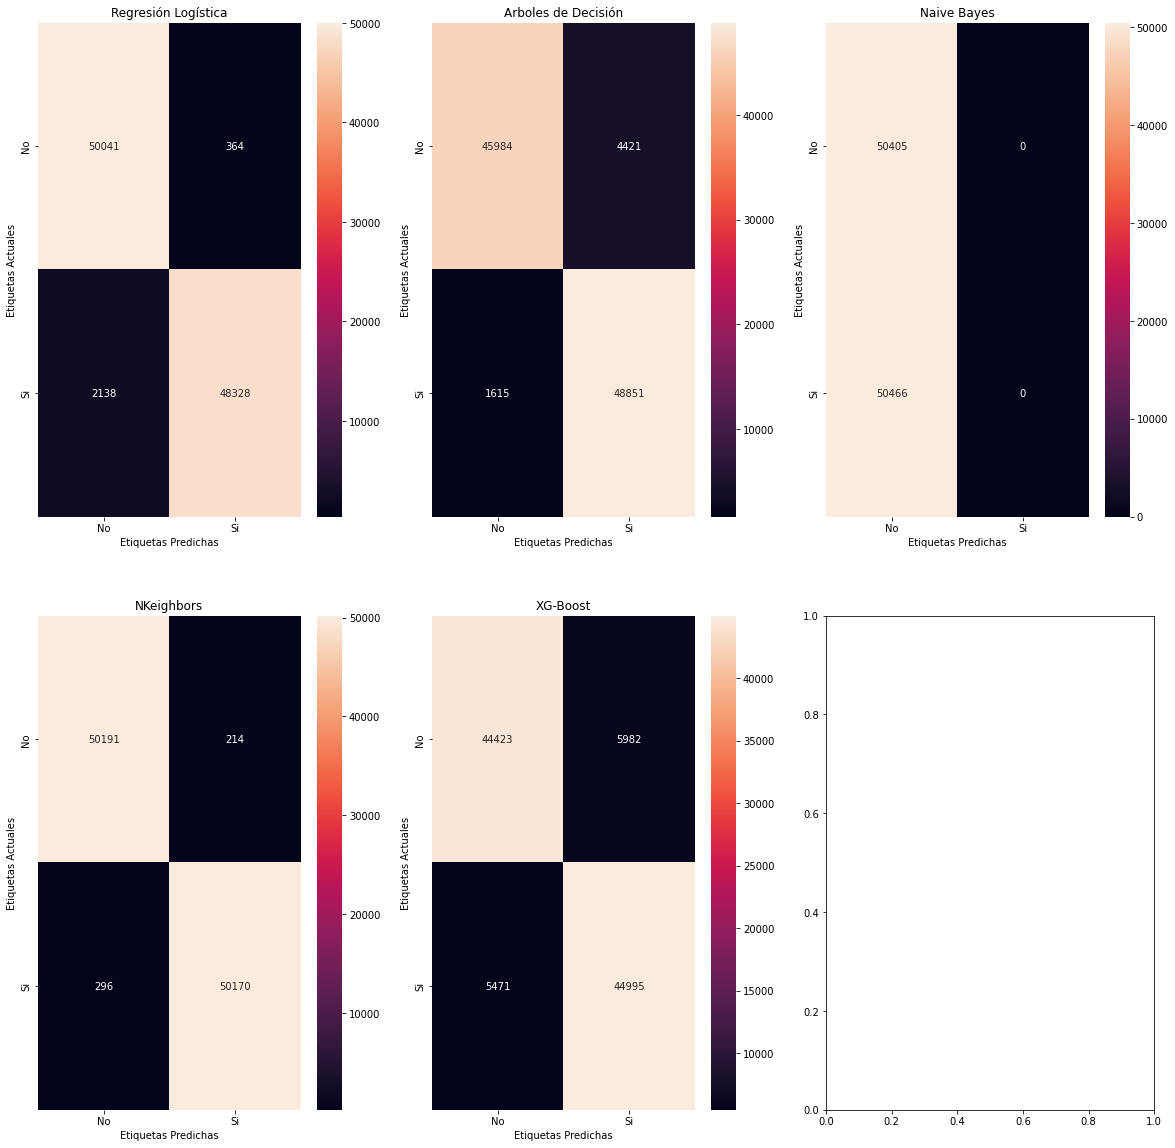

In [105]:
def subplots_confusion_matrix(yhat_ml,model_name):
  fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (20,20))
  for j in range(len(yhat_ml)):
    cm=metrics.confusion_matrix(y_test, yhat_ml[j], labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["No","Si"]],columns = [i for i in ["No","Si"]])
    f = 0 if j<=2 else 1
    c = j if j<=2 else j-3
    sns.heatmap(df_cm, annot=True ,fmt='g', ax = axs[f,c])
    axs[f,c].set_xlabel('Etiquetas Predichas');
    axs[f,c].set_ylabel('Etiquetas Actuales'); 
    axs[f,c].set_title(model_name[j]); 

subplots_confusion_matrix([LogReg_y_pred,dcTree_y_pred,GNB_y_pred,Knn_y_pred,Xgb_y_pred],['Regresión Logística','Arboles de Decisión','Naive Bayes','NKeighbors','XG-Boost'])

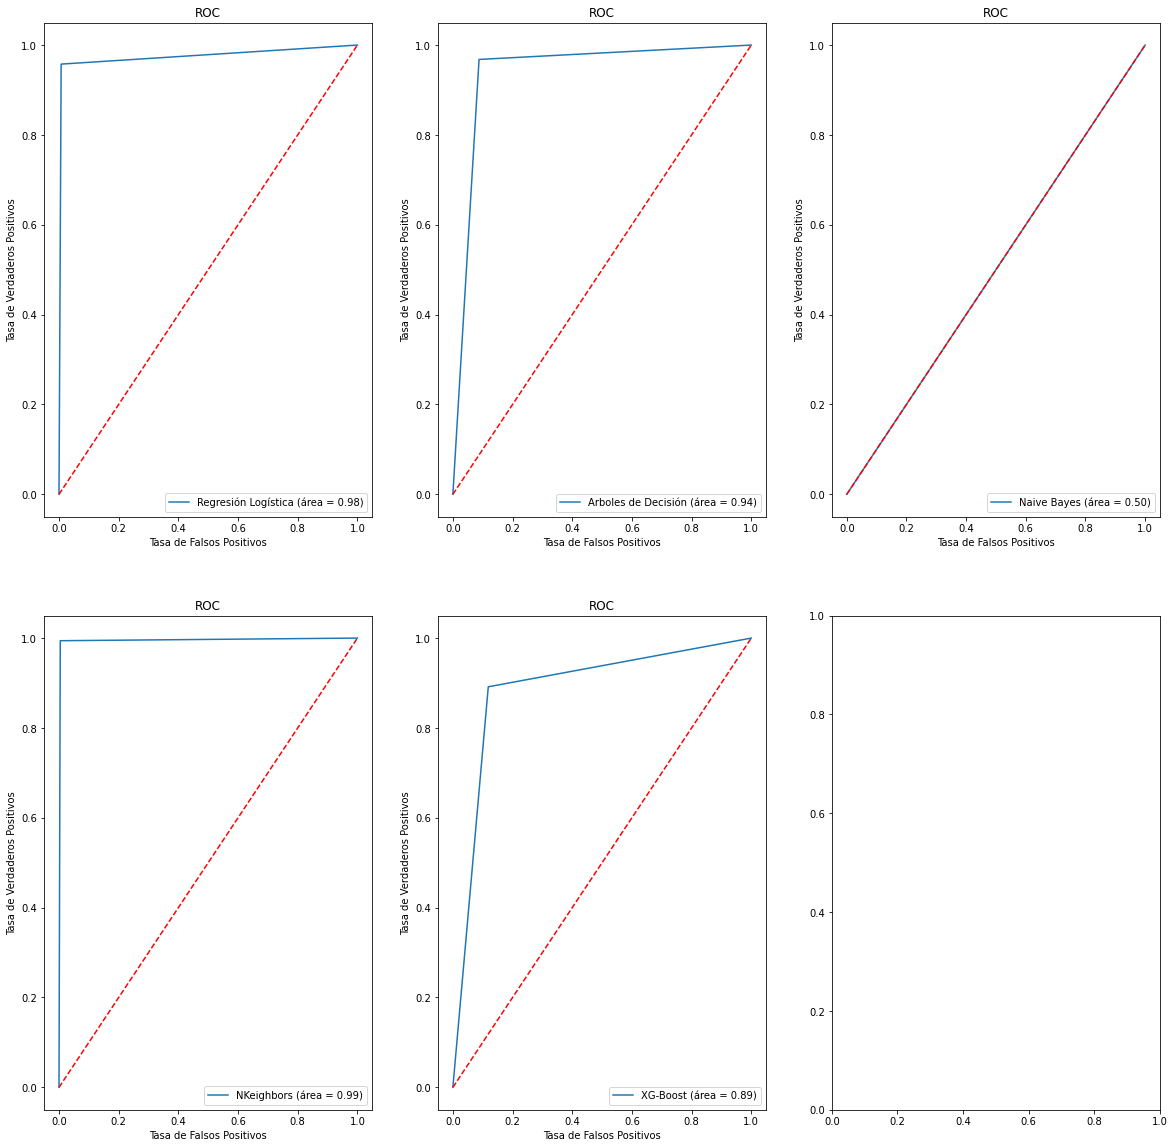

In [104]:
def subplots_roc_curve(yhat_ml,model_name):
  fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (20,20))
  for j in range(len(yhat_ml)):
    fpr,tpr,threshold =  metrics.roc_curve(y_test, yhat_ml[j])
    roc_auc = metrics.roc_auc_score(y_test,yhat_ml[j])
    f = 0 if j<=2 else 1
    c = j if j<=2 else j-3
    axs[f,c].plot(fpr, tpr, label= model_name[j]+' (área = %0.2f)' % roc_auc)
    axs[f,c].plot([0, 1], [0, 1],'r--')
    axs[f,c].set_xlabel('Tasa de Falsos Positivos')
    axs[f,c].set_ylabel('Tasa de Verdaderos Positivos')
    axs[f,c].set_title('ROC'); 
    axs[f,c].legend(loc="lower right");  
  

subplots_roc_curve([LogReg_y_pred,dcTree_y_pred,GNB_y_pred,Knn_y_pred,Xgb_y_pred],['Regresión Logística','Arboles de Decisión','Naive Bayes','NKeighbors','XG-Boost'])

☝ Observando la tabla de resumen de los modelos, matriz de confusión, la curva ROC: 

*   El algoritmo de **KNeighboors tiene el valor más alto de AUC de la CURVA ROC pero presenta altos costos computaciones en ejecución y tendencia al overfitting**
*   El algoritmo de **Regresión Logitisca tiene el segundo valor de AUC de la CURVA ROC pero presenta diferencias marcadas en la precisión de las clases de nuestra variable objetivo**
*   El algoritmo **XGBoost es el más recomendado por sus resultados más estables en los falsos positivos y verdaderos positivos, con un valor de AUC de la CURVA ROC = 0.89**

## 5.2. Insights

### 5.2.1. Primer Insight

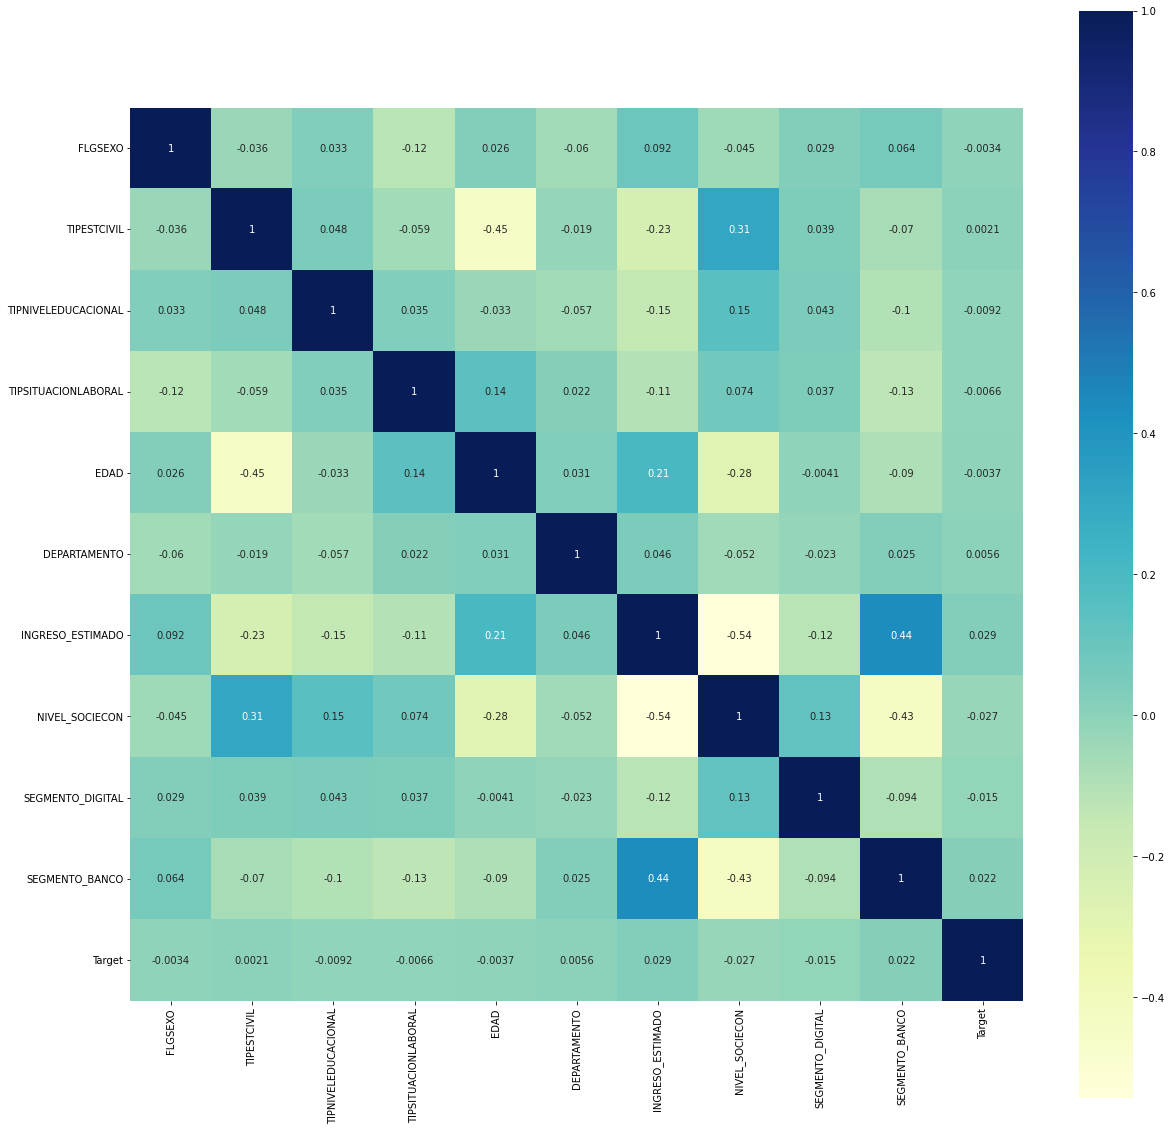

In [106]:
correlation_matrix(df_customers)

🔊 Se ha demostrado que el **ingreso promedio de los clientes es una variable determinante al momento de asignar un grupo bancario** (presenta la mayor correlación de variables de entrada de nuestro dataset).  



### 5.2.2. Segundo Insight

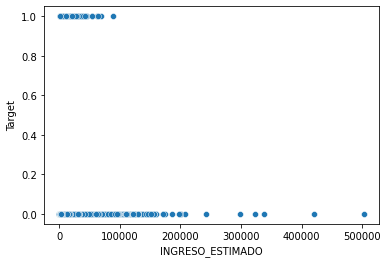

In [109]:
sns.scatterplot(data=df_customers,x='INGRESO_ESTIMADO',y='Target')

In [113]:
print('El ingreso más bajo de los clientes que tienen mayor propensión a realizar un depósito a plazo fijo es: ',min(df_customers['INGRESO_ESTIMADO']))
print('El ingreso más alto de los clientes que tienen mayor propensión a realizar un depósito a plazo fijo es: ',max(df_customers['INGRESO_ESTIMADO']))

El ingreso más bajo de los clientes que tienen mayor propensión a realizar un depósito a plazo fijo es:  350.3
El ingreso más alto de los clientes que tienen mayor propensión a realizar un depósito a plazo fijo es:  501995.0


🔊 Se ha demostrado que el **ingreso promedio es una variable fundamental para nuestro target**. **Los clientes que perciben ingresos bajos (entre 350.2 a 501995.0) son los que tienen mayor propensíon a realizar depósitos a plazos fijos porque prefieren evitar el riesgo** al considerar este instrumento financiero para obtener ganancias sin perder su inversión 

### 5.2.2. Últimos indicadores

In [121]:
df_customers[df_customers['Target']==1]["SEGMENTO_DIGITAL"].value_counts(normalize=True)

0    0.978947
1    0.013158
2    0.007895
Name: SEGMENTO_DIGITAL, dtype: float64

🔊 Se ha demostrado en la sección 2.3.3.lo siguiente:

*  **El nivel Socioeconómico se debe considerar** porque el factor socioeconómico es muy importante para el conocimiento de recursos financieros disponible para los cliente. En este caso, los clientes de nivel socioenomónico "B" tienen mayor propensión a realizar un depósito a plazo fijo
*  **El segmento bancario se debe considerar** porque es fundamental para conocer si los clientes están alineados a las metas de las entidades financieras. En este caso, los Grupos 4 y 5 son los tienen mayor propensión a realizar un depósito a plazo fijo
*  **El segmento digital se debe considerar** porque es fundamental el conocimiento digital al momento de conocer las ventajas y desventajas de este instrumento financiero. En nuestro caso, los clientes que han realizado un depósito a plazo fijo, el 97% de ellos tienen conocimiento digital

## 5.2. Comentarios Finales

☝ El reto consistía de **solucionar el tratamiento de datos faltantes y el desequilibrio de las clases. El algoritmo XGBoost obtuvo un valor de AUC de la CURVA ROC = 0.89 en menor tiempo de ejecución y mayor estabilidad con los datos equilibrados por la técnica SMOTE**

☝ Nuestra solución también **tiene carácter de investigación porque buscamos comprobar las conclusiones finales del siguiente paper: (IRJET- Improving Prediction of Potential Clients for Bank Term Deposits using Machine Learning Approaches, 2019)**


☝ Nuestro modelo más optimo se puede guardar y desplegar a aplicaciones mediante la arquitectura api-rest